# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [85]:
# Parameters
m = 1
A = 0.001#0.03375#0.03#0.1124921875#0.125
run = 1

1

In [86]:
res=m;
N=2.0^m*500.0#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0#100.0*2^m*10
Tf=Nt*dt; #final time
print(Tf)

1.0

In [87]:
print(N)

1000.0

In [88]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.001
dt =0.001
dx/dt =1.0


In [89]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [90]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [91]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
#T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.001
the time step is 0.001


In [92]:
using Printf
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [93]:
using PyCall   
using Interpolations
using Dierckx


####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
"""for i in 4:L-3
    initderpsi[i]=Der(state_array[:,:],i,3,initX)
end

state_array[:,4] = initderpsi
state_array = ghost(state_array)"""

#new
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####


#psi_func = Spline1D(initX[4:L-3], state_array[4:L-3,3],  k=4)
derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4, bc="extrapolate");#new

#funcs = [psi_func, derpsi_func];

In [94]:
#m, beta, psi

dergrid_func=der_grid(initX)
funcs=[derpsi_func dergrid_func]
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX1,0,funcs);

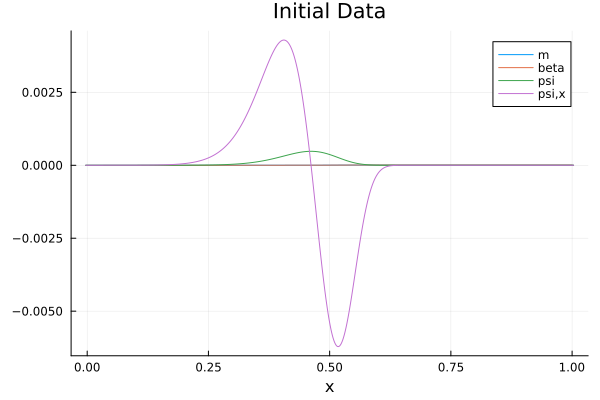

In [95]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [96]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

open(dir*"/res$res/data.txt", "w") do file
    print_muninn(file, 0, state_array[:,1:5])
end

In [97]:
timestep=0
criticality=0.0
explode=0.0
evol_stats = [run criticality A sigma r0 timestep explode]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["run", "criticality", "A", "sigma", "r0", "timestep", "explode"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [98]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [99]:
finaltime=0.3#5#3#1
stats,T_interp = timeevolution(state_array,finaltime,dir,dt,run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);

iteration 1 dt is 0.001, time of iteration is 0.001
auxX[-0.0005000000000000001, 0.0005009995]
auxdata[:,1:3][0.0 0.0 0.0; 3.01376743414989e-24 3.904894358068982e-21 3.3526108338356147e-14]
timestep [3.01376743414989e-24, 3.904894358068982e-21, 3.3526108338356147e-14]
iteration 2 dt is 0.001, time of iteration is 0.002
auxX[-0.001000500125, 1.5003739997505308e-6]
auxdata[:,1:3][0.0 0.0 0.0; 2.027528005854715e-17 1.3513433200995872e-11 1.4707920692335997e-13]
timestep [2.027528005854715e-17, 1.3513433200995872e-11, 1.4707920692335997e-13]
iteration 3 dt is 0.001, time of iteration is 0.003
auxX[-0.0015015011256252504, 0.0005045018653660137]
auxdata[:,1:3][0.0 0.0 0.0; 2.257712900923892e-19 4.034625902742271e-16 2.3006528349954065e-12]
timestep [2.257712900923892e-19, 4.034625902742271e-16, 2.3006528349954065e-12]
iteration 4 dt is 0.001, time of iteration is 0.004
auxX[-0.002003003754003691, 5.006239970313693e-6]
auxdata[:,1:3][0.0 0.0 0.0; 3.413060416468908e-14 6.817535659261271e-9 7.2

auxX[-0.015735980115252433, 0.000767252354287571]
auxdata[:,1:3][0.0 0.0 0.0; -0.042075233761922626 152.63589336030637 0.0005867435039085973]
timestep [-0.042075233761922626, 152.63589336030637, 0.0005867435039085973]
iteration 32 dt is 0.001, time of iteration is 0.03200000000000002
auxX[-0.016251839905902777, 0.0002680193123037705]
auxdata[:,1:3][0.0 0.0 0.0; -314.7943978317432 33331.134084388235 0.0017879002914703373]
timestep [-314.7943978317432, 33331.134084388235, 0.0017879002914703373]
iteration 33 dt is 0.001, time of iteration is 0.03300000000000002
auxX[-0.016768223806958846, 0.0008015247171911141]
auxdata[:,1:3][0.0 0.0 0.0; -3.6296927996122315 785.735360058722 0.0013786128694882678]
timestep [-3.6296927996122315, 785.735360058722, 0.0013786128694882678]
iteration 34 dt is 0.001, time of iteration is 0.03400000000000002
auxX[-0.01728513261743063, 0.00030232592068736856]
auxdata[:,1:3][0.0 0.0 0.0; -6616.851995543443 134172.62899420617 0.004168649541561371]
timestep [-6616.85

auxX[-0.030911661537422367, 0.0009325163695804643]
auxdata[:,1:3][0.0 0.0 0.0; -1.711905469861387e8 4.943804813535051e6 -0.10323393573462562]
timestep [-1.711905469861387e8, 4.943804813535051e6, -0.10323393573462562]
iteration 61 dt is 0.001, time of iteration is 0.06100000000000005
auxX[-0.031443050964369286, 0.0004334484511566546]
auxdata[:,1:3][0.0 0.0 0.0; 2.1108712381039578e11 3.2805288787500024e8 -0.26625156568558556]
timestep [2.1108712381039578e11, 3.2805288787500024e8, -0.26625156568558556]
iteration 62 dt is 0.001, time of iteration is 0.06200000000000005
auxX[-0.03197498834806064, 0.0009964547811061016]
auxdata[:,1:3][0.0 0.0 0.0; -1.561267654069408e9 8.697465542361373e6 0.14854961801541391]
timestep [-1.561267654069408e9, 8.697465542361373e6, 0.14854961801541391]
iteration 63 dt is 0.001, time of iteration is 0.06300000000000004
auxX[-0.03250747453634862, 0.0004974507394261454]
  
25.090639797855264
x1 isssssssss -0.03250747453634862
auxdata[:,1:3][0.0 0.0 0.0; 4.2388786638

auxX[-0.04654756551288535, 0.00044268157796175864]
auxdata[:,1:3][0.0 0.0 0.0; 0.0026966204809278443 6.102728846237084 -3.12807109571209e-5]
timestep [0.0026966204809278443, 6.102728846237084, -3.12807109571209e-5]
iteration 90 dt is 0.001, time of iteration is 0.09000000000000007
auxX[-0.04709519641632582, 0.0010350480292839292]
auxdata[:,1:3][0.0 0.0 0.0; 4.587967540766262e-5 0.044261301333587556 9.417878790656272e-6]
timestep [4.587967540766262e-5, 0.044261301333587556, 9.417878790656272e-6]
iteration 91 dt is 0.001, time of iteration is 0.09100000000000007
auxX[-0.04764340059150489, 0.0005360825416510012]
auxdata[:,1:3][0.0 0.0 0.0; 0.00016947292748200775 0.3159734820744274 9.376855128555019e-6]
timestep [0.00016947292748200775, 0.3159734820744274, 9.376855128555019e-6]
iteration 92 dt is 0.001, time of iteration is 0.09200000000000007
auxX[-0.04819217893890636, 3.6618480500406046e-5]
auxdata[:,1:3][0.0 0.0 0.0; 0.035960794681649824 984.453429567456 9.34153784048002e-6]
timestep [0

auxX[-0.06322957420513942, 0.0009622985289320166]
auxdata[:,1:3][0.0 0.0 0.0; 2.657958959305694e-11 2.7587287555683365e-8 -5.850789542383702e-9]
timestep [2.657958959305694e-11, 2.7587287555683365e-8, -5.850789542383702e-9]
iteration 120 dt is 0.001, time of iteration is 0.12000000000000009
auxX[-0.06379480276887162, 0.00046326036445171876]
auxdata[:,1:3][0.0 0.0 0.0; 1.0059668977462608e-9 2.1703598526577372e-6 -1.7330283333744085e-8]
timestep [1.0059668977462608e-9, 2.1703598526577372e-6, -1.7330283333744085e-8]
iteration 121 dt is 0.001, time of iteration is 0.1210000000000001
auxX[-0.06436063246007065, 0.0010882429210606584]
auxdata[:,1:3][0.0 0.0 0.0; 2.2201862939609822e-11 2.0372918160519275e-8 -5.9942878200964395e-9]
timestep [2.2201862939609822e-11, 2.0372918160519275e-8, -5.9942878200964395e-9]
iteration 122 dt is 0.001, time of iteration is 0.1220000000000001
auxX[-0.06492706423803606, 0.000589330571845391]
auxdata[:,1:3][0.0 0.0 0.0; 5.879799571599586e-10 9.970285430802325e-7

auxX[-0.07986881473868553, 0.00013846548466779434]
auxdata[:,1:3][0.0 0.0 0.0; 6.109995420881128e-9 4.412022440332163e-5 -1.1592325240689487e-8]
timestep [6.109995420881128e-9, 4.412022440332163e-5, -1.1592325240689487e-8]
iteration 149 dt is 0.001, time of iteration is 0.1490000000000001
auxX[-0.0804518730672081, 0.0007930247123847082]
auxdata[:,1:3][0.0 0.0 0.0; 9.5892064797558e-13 1.2081006905446593e-9 -8.255982530317291e-10]
timestep [9.5892064797558e-13, 1.2081006905446593e-9, -8.255982530317291e-10]
iteration 150 dt is 0.001, time of iteration is 0.1500000000000001
auxX[-0.08103556119221529, 0.0002938174226529953]
auxdata[:,1:3][0.0 0.0 0.0; 2.534785145781735e-10 8.624410327255674e-7 -4.9738247191788764e-9]
timestep [2.534785145781735e-10, 8.624410327255674e-7, -4.9738247191788764e-9]
iteration 151 dt is 0.001, time of iteration is 0.1510000000000001
auxX[-0.08161988013449639, 0.0009506544997432163]
auxdata[:,1:3][0.0 0.0 0.0; 6.660898269766726e-12 6.998897263963913e-9 -2.5899304

iteration 177 dt is 0.001, time of iteration is 0.17700000000000013
auxX[-0.09703698673684212, 0.0008551680978190207]
auxdata[:,1:3][0.0 0.0 0.0; 2.465388839134658e-13 2.880200629856195e-10 -4.166283716219367e-10]
timestep [2.465388839134658e-13, 2.880200629856195e-10, -4.166283716219367e-10]
iteration 178 dt is 0.001, time of iteration is 0.17800000000000013
auxX[-0.09763873181197645, 0.00035602290026060153]
auxdata[:,1:3][0.0 0.0 0.0; 4.312178058761574e-11 1.2107578145967342e-7 -2.2940670995241296e-9]
timestep [4.312178058761574e-11, 1.2107578145967342e-7, -2.2940670995241296e-9]
iteration 179 dt is 0.001, time of iteration is 0.17900000000000013
auxX[-0.09824113720476335, 0.0010431823189565217]
auxdata[:,1:3][0.0 0.0 0.0; 1.3081837344765106e-12 1.2525575336997055e-9 -1.1635404965893613e-9]
timestep [1.3081837344765106e-12, 1.2525575336997055e-9, -1.1635404965893613e-9]
iteration 180 dt is 0.001, time of iteration is 0.18000000000000013
auxX[-0.09884420400248774, 0.000544224957160802

auxX[-0.11413906040781283, 7.351169062385613e-5]
auxdata[:,1:3][0.0 0.0 0.0; 1.1004444675049452e-9 1.4968544570578726e-5 -2.2440268144192916e-9]
timestep [1.1004444675049452e-9, 1.4968544570578726e-5, -2.2440268144192916e-9]
iteration 206 dt is 0.001, time of iteration is 0.20600000000000016
auxX[-0.11475971333077603, 0.0007900113620707101]
auxdata[:,1:3][0.0 0.0 0.0; 3.7080931255930454e-14 4.68974447245837e-11 -1.3922285563251626e-10]
timestep [3.7080931255930454e-14, 4.68974447245837e-11, -1.3922285563251626e-10]
iteration 207 dt is 0.001, time of iteration is 0.20700000000000016
auxX[-0.11538105794000872, 0.0002908010613738042]
auxdata[:,1:3][0.0 0.0 0.0; 1.1665130375696141e-11 4.010180738545787e-8 -9.089779911097438e-10]
timestep [1.1665130375696141e-11, 4.010180738545787e-8, -9.089779911097438e-10]
iteration 208 dt is 0.001, time of iteration is 0.20800000000000016
auxX[-0.11600309539221437, 0.0010096727457207851]
auxdata[:,1:3][0.0 0.0 0.0; 2.7462227253723386e-13 2.71691858290310

auxX[-0.1324231085429655, 0.0003624875887394105]
auxdata[:,1:3][0.0 0.0 0.0; 7.306529713140658e-13 2.0149139729310675e-9 -2.6790040010145603e-10]
timestep [7.306529713140658e-13, 2.0149139729310675e-9, -2.6790040010145603e-10]
iteration 235 dt is 0.001, time of iteration is 0.23500000000000018
auxX[-0.13306429959134658, 0.0011113624105635075]
auxdata[:,1:3][0.0 0.0 0.0; 2.210414710453308e-14 1.9865412336625263e-11 -1.4216695007978115e-10]
timestep [2.210414710453308e-14, 1.9865412336625263e-11, -1.4216695007978115e-10]
iteration 236 dt is 0.001, time of iteration is 0.23600000000000018
auxX[-0.1337062169448508, 0.0006124731554108668]
auxdata[:,1:3][0.0 0.0 0.0; 4.414868370262041e-13 7.20366126735264e-10 -3.5014777083027403e-10]
timestep [4.414868370262041e-13, 7.20366126735264e-10, -3.5014777083027403e-10]
iteration 237 dt is 0.001, time of iteration is 0.23700000000000018
auxX[-0.13434886183802053, 0.00011308544100459414]
auxdata[:,1:3][0.0 0.0 0.0; 3.103203353214194e-11 2.74381003473

iteration 264 dt is 0.001, time of iteration is 0.2640000000000002
auxX[-0.151979872821037, 0.0005533449690549258]
auxdata[:,1:3][0.0 0.0 0.0; 2.66804018308468e-12 4.8189083479729606e-9 7.389029230646129e-10]
timestep [2.66804018308468e-12, 4.8189083479729606e-9, 7.389029230646129e-10]
iteration 265 dt is 0.001, time of iteration is 0.2650000000000002
auxX[-0.1526434016347294, 5.3898160928652814e-5]
auxdata[:,1:3][0.0 0.0 0.0; 1.3738260519805493e-9 2.5487915766599537e-5 1.633135402173827e-9]
timestep [1.3738260519805493e-9, 2.5487915766599537e-5, 1.633135402173827e-9]
iteration 266 dt is 0.001, time of iteration is 0.2660000000000002
auxX[-0.15330769504039543, 0.0008373893556228416]
auxdata[:,1:3][0.0 0.0 0.0; 2.1139239940296178e-12 2.522211807263694e-9 9.909436202563762e-10]
timestep [2.1139239940296178e-12, 2.522211807263694e-9, 9.909436202563762e-10]
iteration 267 dt is 0.001, time of iteration is 0.2670000000000002
auxX[-0.1539727543601151, 0.0003382263943679975]
auxdata[:,1:3][0.0

auxX[-0.17153753712488823, 0.00034604603075287705]
auxdata[:,1:3][0.0 0.0 0.0; 1.1170243848266065e-7 0.00032268305061228833 9.021141599822269e-8]
timestep [1.1170243848266065e-7, 0.00032268305061228833, 9.021141599822269e-8]
iteration 294 dt is 0.001, time of iteration is 0.2940000000000002
auxX[-0.17222378722533457, 0.001161613959670388]
auxdata[:,1:3][0.0 0.0 0.0; 2.4777856249076583e-9 2.130449740832536e-6 4.491937097921972e-8]
timestep [2.4777856249076583e-9, 2.130449740832536e-6, 4.491937097921972e-8]
iteration 295 dt is 0.001, time of iteration is 0.2950000000000002
auxX[-0.172910841529003, 0.0006627748989565624]
auxdata[:,1:3][0.0 0.0 0.0; 5.508033535092511e-8 8.304896383373286e-5 1.2083522501810023e-7]
timestep [5.508033535092511e-8, 8.304896383373286e-5, 1.2083522501810023e-7]
iteration 296 dt is 0.001, time of iteration is 0.2960000000000002
auxX[-0.17359870145009113, 0.0001634374542202352]
auxdata[:,1:3][0.0 0.0 0.0; 2.506919679601269e-6 0.01533618607164338 2.010184744662527e

 ## Movie of the evolution

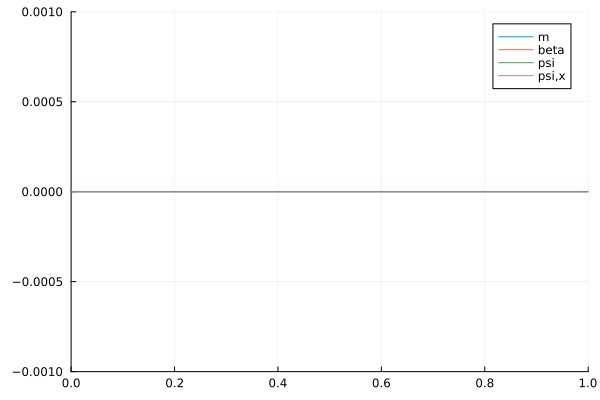

In [ ]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:1:300#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(plot5, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.001,0.001], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [190]:
x_func=Spline1D(state_array[4:L-3,5],initX1)
x_func(0) #this works better
ori=find_origin(state_array[:,5]);
#rk4 will be on x from x=0 to x_func(state_array[ori,5])


LoadError: Error on entry, no approximation returned. The following conditions
must hold:
1<=k<=5
x[1] < x[2] < ... < x[end]
w[i] > 0.0 for all i

Additionally, if spline knots are given:
length(xknots) <= length(x) + k + 1
x[1] < xknots[1] < xknots[k+2] < ... < xknots[end] < x[end]
The schoenberg-whitney conditions: there must be a subset of data points
xx[j] such that t[j] < xx[j] < t[j+k+1] for j=1,2,...,n-k-1

In [191]:
y0=[0 0 0]
auxX=initX[4:ori]
#aux_state_array[1:2,1:3] = n_rk4wrapper(RHS,y0,auxX,t,funcs)

Float64[]

In [192]:
initX[ori]

LoadError: ArgumentError: invalid index: 0.0 of type Float64

In [117]:
der_grid(state_array[:,5])
scatter(initX1,state_array[4:L-3,5],xlim=[-0.1,0.1])
aa=Spline1D(initX1,state_array[4:L-3,5])
aa(0) #this works better

-0.17635822570890156

In [286]:
der_grid(state_array[:,5])
scatter(state_array[4:L-3,5], initX1,xlim=[-0.1,0.1])
aa=Spline1D(state_array[4:L-3,5], initX1)
roots(aa)

1-element Vector{Float64}:
 -0.17635822570890153

In [341]:
xtilde_func=Spline1D(initX1,state_array[4:L-3,5]);
xtilde_func(0)
X=state_array[:,5]
ori=find_origin(X)
auxX=vcat(xtilde_func(0),X[ori:L-3]);

In [161]:
derpsi_func = Spline1D(X[ori:L-3],state_array[ori:L-3,4],k=4)#new
dergrid_func=der_grid(X)
funcs=[derpsi_func dergrid_func];

In [162]:
y0=[0 0 0]
state_array[ori-1:L-3,5]=auxX
state_array[ori-1:L-3,1:3] = n_rk4wrapper(RHS,y0,auxX,0,funcs)#*dxtilde/dx = 1!!!??aqui

1002×3 Matrix{Float64}:
 0.0          0.0           0.0
 0.0          0.0           5.3865e-48
 1.27058e-23  1.49447e-20   4.40117e-14
 3.35876e-22  2.08883e-19   3.58695e-13
 2.61485e-21  1.08216e-18   1.23331e-12
 1.14703e-20  3.55018e-18   2.97827e-12
 3.65318e-20  9.02145e-18   5.92618e-12
 9.493e-20    1.94859e-17   1.04329e-11
 2.14315e-19  3.76135e-17   1.68786e-11
 4.36473e-19  6.68647e-17   2.56691e-11
 8.21626e-19  1.11613e-16   3.72366e-11
 1.4535e-18   1.7728e-16    5.20414e-11
 2.44527e-18  2.70491e-16   7.05731e-11
 ⋮                         
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-

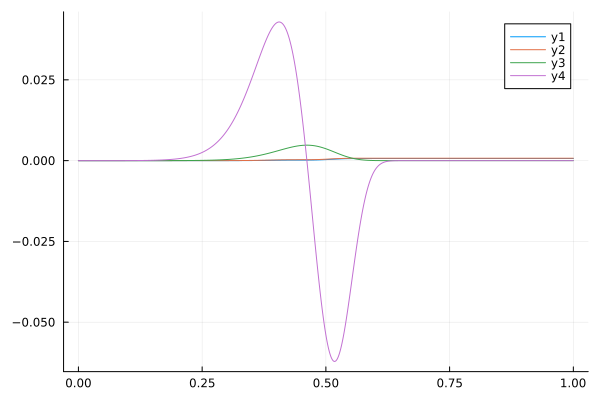

In [164]:
plot(X[ori:L-3], state_array[ori:L-3,1:4])